In [7]:
# First things first
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Now let's import seaborn
# See how it beautifies the style automatically?
# If you get an error executing this cell, see the red note above.
import seaborn as sns


# Import and Clean Data

In [8]:
#preload some datasets
df_all = pd.DataFrame.from_csv('nutritions.csv', index_col=None)
df_all = df_all.dropna()
df = df_all
df

,FoodID,GroupID,Food,Group,Protein,Fat,Carbohydrate,Ash,Energy,Water,Sugars,Fiber,Calcium,Iron,Sodium
0,8001,800,"Cereals ready-to-eat, KELLOGG, KELLOGG'S ALL-B...",Breakfast Cereals,13.14,4.90,74.24,5.60,260,2.12,15.69,29.3,389,17.60,258
1,8002,800,"Cereals ready-to-eat, POST, ALPHA-BITS",Breakfast Cereals,8.10,3.80,83.70,3.20,385,1.20,35.50,5.7,29,6.40,634
2,8003,800,"Cereals ready-to-eat, KELLOGG, KELLOGG'S APPLE...",Breakfast Cereals,5.00,1.90,88.20,2.40,366,2.50,44.00,9.3,11,16.10,459
3,8005,800,"Cereals ready-to-eat, KELLOGG, KELLOGG'S ALL-B...",Breakfast Cereals,7.00,2.15,80.00,7.90,250,3.00,27.00,43.0,63,15.00,676
4,8010,800,"Cereals ready-to-eat, QUAKER, CAP'N CRUNCH",Breakfast Cereals,4.39,5.12,85.51,2.48,398,2.50,44.32,2.5,11,19.42,754
5,8011,800,"Cereals ready-to-eat, QUAKER, CAP'N CRUNCH wit...",Breakfast Cereals,4.45,4.83,85.90,2.32,397,2.50,44.20,2.6,11,19.88,725
6,8012,800,"Cereals ready-to-eat, QUAKER, CAP'N CRUNCH'S P...",Breakfast Cereals,7.10,9.23,78.65,2.52,417,2.50,33.36,2.7,9,18.36,742
7,8013,800,"Cereals ready-to-eat, GENERAL MILLS, CHEERIOS",Breakfast Cereals,12.09,6.73,73.23,2.81,371,5.13,4.36,9.4,401,33.17,576
8,8014,800,"Cereals ready-to-eat, KELLOGG, KELLOGG'S COCOA...",Breakfast Cereals,5.22,2.90,86.05,3.02,389,2.81,38.50,1.9,130,14.70,424
9,8015,800,"Cereals ready-to-eat, POST, COCOA PEBBLES",Breakfast Cereals,4.70,4.20,85.80,2.80,397,2.50,34.50,1.5,21,6.00,586


# (a) Create a scatter plot to display the values of Energy and Fat for Fast Foods and Sweets.

C:\Users\Aimable\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


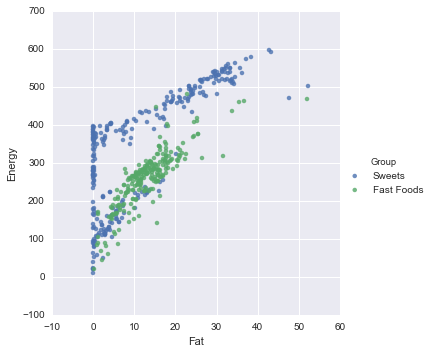

In [9]:
# Adding "hue" to the scatter plot.
# This is a slightly different function:
#   lmplot means "linear model plot".
# Note that we have to filter the distributors, 
# otherwise we would end up with too many colors.
few_distributors = ['Fast Foods', 'Sweets']
df_few_distributors = df[df['Group'].isin(few_distributors)]
sns.lmplot('Fat', 'Energy', 
           data=df_few_distributors,
           hue='Group', fit_reg=False);

# (b) Create a bar plot to compare the mean Fat value of food items that contain "egg", "apple", and "chocolate" respectively.

C:\Users\Aimable\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


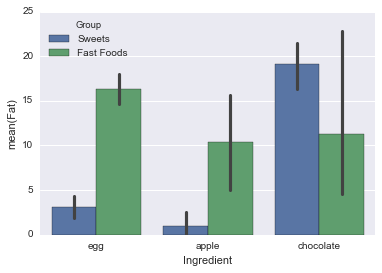

In [10]:
# Adding a hue channel to the bar plot
# Compare two distributors only
df_eggz = df[df.Food.str.lower().str.contains('egg')].copy()
df_applez = df[df.Food.str.lower().str.contains('apple')].copy()
df_chocolatez = df[df.Food.str.lower().str.contains('chocolate')].copy()

df_eggz['Ingredient'] = 'egg'
df_applez['Ingredient'] = 'apple'
df_chocolatez['Ingredient'] = 'chocolate'
dftogether = pd.concat([df_eggz, df_applez, df_chocolatez])

df_universal_disney = dftogether[dftogether.Group.isin(('Sweets', 'Fast Foods'))]
sns.barplot(x='Ingredient', y='Fat', 
            data=df_universal_disney,hue='Group'
            );




# (c) Create a box plot for the same groups of data as above.

Explain the similarity and difference between this plot and the previous plot.

C:\Users\Aimable\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


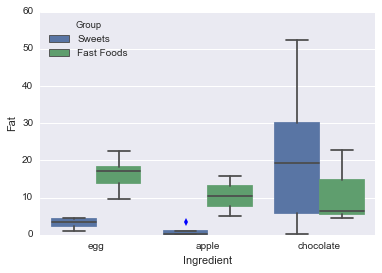

In [11]:
# Create a box plot, using the same data as above
sns.boxplot(x='Ingredient', y='Fat', 
           data=df_universal_disney,hue='Group'
            );


# Similarities: For the two graphs, we can visualize and determine the size variations and differences between categories.

# Differences: The difference between these two graphs is that the bar plot shows the confidence intervals and means. While the boxplot shows the medians, minimum, maximum, quartiles and outliers.


The box plot provides a more comprehensive presentation of the data. The bar plot and the box plot are equally expressive, but the box plot is more effective. Rather than simply providing the mean and confidence interval, the boxplot shows quartile, median, and a more complete distribution with outliers. They represent the same data, but in different manners and with different levels of effectiveness depending on what someone is trying to glean from the charts.

# (d) Create a stacked bar chart comparing the mean values of all five proximates (fat, protein, carbs, ash, and water) for all food groups.

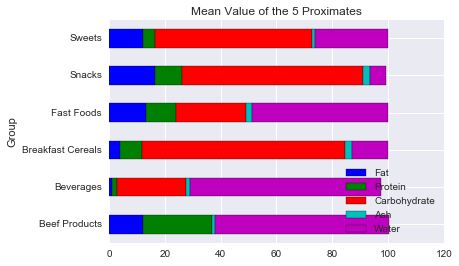

In [12]:
fiveproximates = df.groupby('Group')
meanproximates = fiveproximates[['Fat','Protein','Carbohydrate','Ash','Water']].mean()
meanproximates.plot(kind='barh', stacked=True)
plt.title('Mean Value of the 5 Proximates')

# (e) Create two histograms showing the distribution of Fat for Fat Foods, using 10 bins and 100 bins respectively.

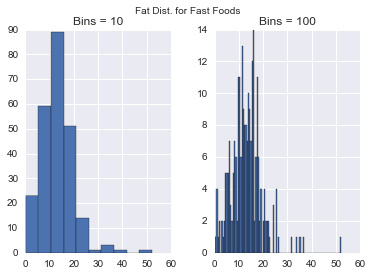

In [13]:
dffastfoodz = df[df.Group == 'Fast Foods']
fig, axes = plt.subplots(ncols=2)

dffastfoodz.hist('Fat', bins=10, ax=axes[0]);
dffastfoodz.hist('Fat', bins=100, ax=axes[1]);
plt.suptitle("Fat Dist. for Fast Foods")
axes[0].set_title('Bins = 10')
axes[1].set_title('Bins = 100')

# (f) Create a scatter plot matrix (SPLOM) displaying the relations among Energy, Fat, Protein, and Carbohydrate.

C:\Users\Aimable\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


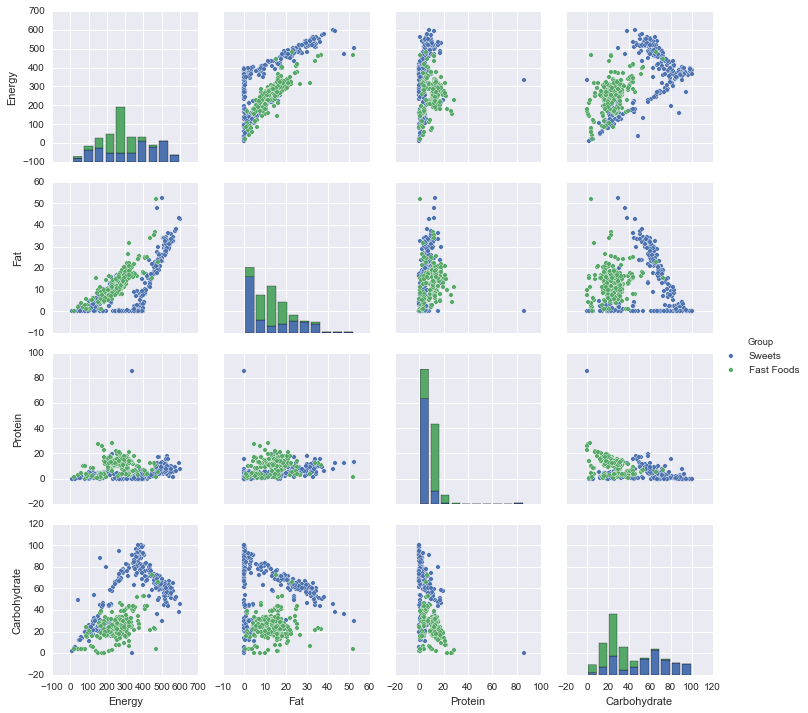

In [14]:
#group together and then plot against each other
dfsweetfastfood = df[df.Group.isin(('Sweets', 'Fast Foods'))]
scatterbb = dfsweetfastfood[['Energy','Fat','Protein','Carbohydrate','Group']]

sns.pairplot(scatterbb, hue = 'Group');

# (g) Create two scatter plots with a fitted curve displaying the relationship of Energy vs. Fat among Fast Foods. Use linear fit and 2nd-order polynomial fit respectively.

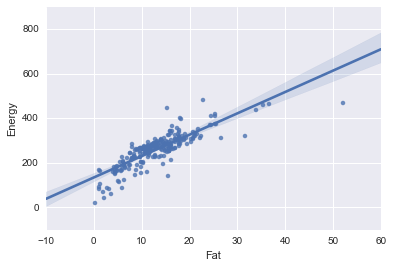

In [15]:
# Create a scatter plot with a linear fitted line.'
dffastfoodz= df[df.Group =='Fast Foods']
sns.regplot(x='Fat', y='Energy', data=dffastfoodz,order=1);


# (g) Create two scatter plots with a fitted curve displaying the relationship of Energy vs. Fat among Fast Foods. Use 2nd-order polynomial fit respectively.

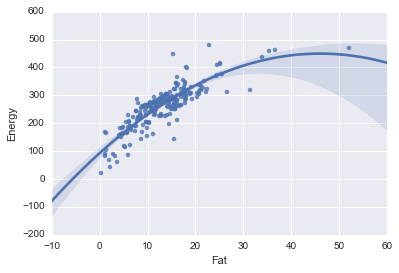

In [16]:
# Create a scatter plot with a linear fitted line.'
dffastfoodz= df[df.Group =='Fast Foods']
sns.regplot(x='Fat', y='Energy', data=dffastfoodz,order=2);

# (h) Create a scatterplot with marginal histograms (SPLOM) for Energy vs. Fat among Fast Foods.

C:\Users\Aimable\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


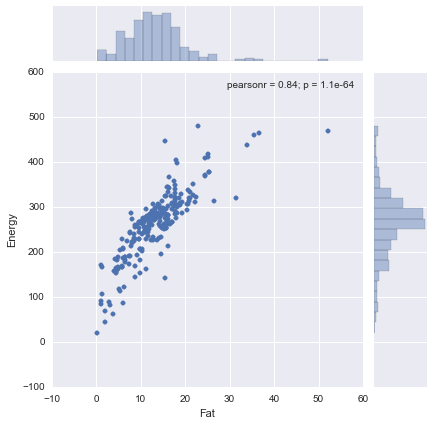

In [17]:
# Create a scatter plot with marginal histograms.
sns.jointplot(x='Fat', y='Energy', data=dffastfoodz);

# 3) Outlier Detection and Removal

# (a) Create a linear regression model of Energy and Fat for Fast Foods, which should be identical to the one created in the previous homework.

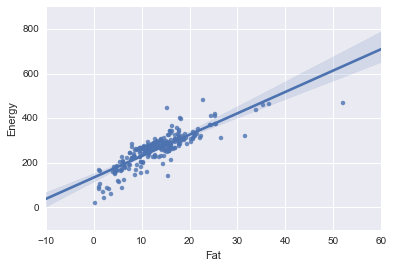

In [18]:
sns.regplot(x='Fat', y='Energy', data=dffastfoodz);

# (b) Which item in Fast Foods has the highest Fat? Do you think (make a guess) if it is an outlier in the regression model?

In [19]:
dffastfoodz.sort('Fat', ascending=False)


C:\Users\Aimable\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,FoodID,GroupID,Food,Group,Protein,Fat,Carbohydrate,Ash,Energy,Water,Sugars,Fiber,Calcium,Iron,Sodium
1617,21311,2100,"McDONALD'S, Creamy Ranch Sauce",Fast Foods,1.11,52.03,3.49,2.01,468,41.36,3.45,0.0,29,0.25,708
1728,21429,2100,"KENTUCKY FRIED CHICKEN, Fried Chicken, EXTRA C...",Fast Foods,10.96,36.61,22.54,2.92,464,26.98,0.00,1.5,41,0.67,828
1743,21444,2100,"POPEYES, Fried Chicken, Mild, Skin and Breading",Fast Foods,12.22,35.39,23.10,2.87,460,26.43,0.00,1.1,25,1.06,738
1758,21468,2100,"Fast Foods, Fried Chicken, Skin and breading f...",Fast Foods,12.06,33.82,21.09,3.02,437,30.01,0.00,1.3,40,0.93,766
1653,21347,2100,"McDONALD'S, NEWMAN'S OWN Creamy Caesar Dressing",Fast Foods,3.56,31.50,6.85,3.19,319,54.90,3.00,0.1,104,0.28,851
1655,21349,2100,"McDONALD'S, NEWMAN'S OWN Ranch Dressing",Fast Foods,2.62,26.57,16.75,2.71,313,51.35,6.57,0.3,77,0.25,954
1685,21384,2100,"BURGER KING, CROISSAN'WICH with Sausage and Ch...",Fast Foods,13.73,25.45,23.00,2.75,376,35.08,3.36,0.7,107,1.87,782
1667,21361,2100,"McDONALD'S, Sausage Biscuit",Fast Foods,9.62,25.40,27.20,3.07,376,34.71,1.97,1.2,55,2.01,875
1522,21130,2100,"Fast foods, onion rings, breaded and fried",Fast Foods,3.86,25.23,43.58,2.82,411,24.52,5.43,2.7,115,0.78,776
1798,21509,2100,"BURGER KING, Onion Rings",Fast Foods,3.86,25.23,43.58,2.82,417,24.52,5.43,2.7,115,0.78,776


# (c) Use an appropriate diagnostic statistic (DFFITS, Cook's distance, studentized residuals, ...) of your choice to find the outliers in the regression model.

In [20]:
# Find outliers using Cook's Distance

modelfats = smf.ols('Energy ~ Fat', data=dffastfoodz).fit()
modelfats.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Energy   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     559.8
Date:                Thu, 31 Dec 2015   Prob (F-statistic):           1.13e-64
Time:                        20:56:17   Log-Likelihood:                -1239.8
No. Observations:                 242   AIC:                             2484.
Df Residuals:                     240   BIC:                             2490.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    134.6526      5.934     22.692      0.000       122.963   146.342
Fat            9.5708      0.404     23.661      0.000         8.774    10.368
==============================================================================
Omnibus:                       31.267   Durbin-Watson:                   1.163
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.528
Skew:                          -0.540   Prob(JB):                     1.62e-19
Kurtosis:                       5.723   Cond. No.                         33.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
influence = modelfats.get_influence()
cooks_distance = influence.cooks_distance[0]
number_of_observations = len(dffastfoodz)

# Use an empirical threshold value
cooks_threshold = 4 / number_of_observations

# Show outliers
dffastfoodz[cooks_distance > cooks_threshold]

,FoodID,GroupID,Food,Group,Protein,Fat,Carbohydrate,Ash,Energy,Water,Sugars,Fiber,Calcium,Iron,Sodium
1529,21139,2100,"Fast foods, potato, mashed",Fast Foods,1.65,2.82,14.65,1.26,89,79.62,0.50,1.3,18,0.31,306
1617,21311,2100,"McDONALD'S, Creamy Ranch Sauce",Fast Foods,1.11,52.03,3.49,2.01,468,41.36,3.45,0.0,29,0.25,708
1620,21314,2100,"McDONALD'S, Spicy Buffalo Sauce",Fast Foods,0.54,15.45,1.81,6.20,142,76.00,0.00,1.5,9,0.35,2140
1631,21325,2100,"McDONALD'S, McDONALDLAND Chocolate Chip Cookies",Fast Foods,5.56,22.79,66.24,1.23,480,4.19,33.86,2.0,34,3.89,293
1632,21326,2100,"McDONALD'S, McDONALDLAND Cookies",Fast Foods,6.56,15.35,72.75,1.37,447,3.97,24.13,1.6,17,3.37,483
1653,21347,2100,"McDONALD'S, NEWMAN'S OWN Creamy Caesar Dressing",Fast Foods,3.56,31.50,6.85,3.19,319,54.90,3.00,0.1,104,0.28,851
1654,21348,2100,"McDONALD'S, NEWMAN'S OWN Low Fat Balsamic Vina...",Fast Foods,0.19,5.94,24.65,3.17,86,66.05,6.74,0.4,8,0.28,1562
1655,21349,2100,"McDONALD'S, NEWMAN'S OWN Ranch Dressing",Fast Foods,2.62,26.57,16.75,2.71,313,51.35,6.57,0.3,77,0.25,954
1674,21370,2100,"McDONALD'S, Caesar Salad with Grilled Chicken",Fast Foods,9.82,1.90,3.81,1.51,68,82.95,1.61,1.1,64,0.61,196
1676,21372,2100,"McDONALD'S, Caesar Salad without chicken",Fast Foods,3.18,2.05,4.28,0.92,44,89.71,2.08,1.6,86,0.61,83


# (d) Remove the outliers you find in (c) from the data, and create a new linear regression model. Report the new coefficients, R-squared score, and the confidence intervals of the coefficients.

In [22]:
# Remove outliers
# using Cook's Distance
outlier_criterion = (cooks_distance > cooks_threshold)
outlier_indexes = np.nonzero(outlier_criterion)[0]

df_ans3_cleaned = dffastfoodz[~outlier_criterion]
print("%d points before removal; %d after removal."%(
        len(dffastfoodz), len(df_ans3_cleaned)))

242 points before removal; 226 after removal.


In [23]:
modelfats2 = smf.ols('Energy ~ Fat', data=df_ans3_cleaned).fit()
modelfats2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Energy   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     694.0
Date:                Thu, 31 Dec 2015   Prob (F-statistic):           1.50e-70
Time:                        20:56:18   Log-Likelihood:                -1088.2
No. Observations:                 226   AIC:                             2180.
Df Residuals:                     224   BIC:                             2187.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    139.9323      5.147     27.188      0.000       129.790   150.075
Fat            9.4747      0.360     26.344      0.000         8.766    10.183
==============================================================================
Omnibus:                        5.856   Durbin-Watson:                   1.414
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                5.521
Skew:                          -0.347   Prob(JB):                       0.0633
Kurtosis:                       3.324   Cond. No.                         37.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# (e) Create a new scatterplot, showing all the data points, and both the old and the new regression lines.

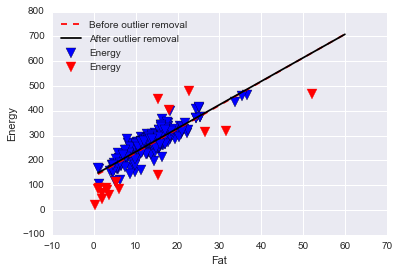

In [28]:
# Plot the old and new regression lines together
xs = np.linspace(1,60, 2)
ys1 = modelfats.predict({'Fat': xs})
ys2 = modelfats2.predict({'Fat': xs})
plt.scatter(df_ans3_cleaned.Fat, df_ans3_cleaned.Energy, 
            s=100, marker='v')
plt.scatter(dffastfoodz.Fat.iloc[outlier_indexes], 
            dffastfoodz.Energy.iloc[outlier_indexes], 
            s=100, color='r', marker='v')
plt.plot(xs, ys1, 'r--', label='Before outlier removal')
plt.plot(xs, ys2, 'k', label='After outlier removal')
plt.legend(loc='upper left')
plt.xlabel('Fat')
plt.ylabel('Energy')
plt.grid(True)



# (f) Repeat steps (c) - (e) using a different statistic. Compare the results generated by both statistics

In [24]:
# Find outliers using DFFITS
number_of_observations = len(dffastfoodz)
number_of_parameters = 2  # parameters include: intercept, x
dffits = influence.dffits[0]

# Use an empirical threshold
dffits_threshold = 2 * np.sqrt(number_of_parameters / number_of_observations)
dffastfoodz[['Fat', 'Energy']][np.abs(dffits) > dffits_threshold].head()

,Fat,Energy
1529,2.82,89
1617,52.03,468
1620,15.45,142
1631,22.79,480
1632,15.35,447


In [25]:
outlier_criterion = (np.abs(dffits) > dffits_threshold)
outlier_indexes = np.nonzero(outlier_criterion)[0]

df_all_fast_food_cleaned = dffastfoodz[~outlier_criterion]
print("%d points before removal; %d after removal."%(
        len(dffastfoodz), len(df_all_fast_food_cleaned)))

242 points before removal; 225 after removal.


In [26]:
model2 = smf.ols('Energy ~ Fat', data=df_all_fast_food_cleaned).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Energy   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     692.7
Date:                Thu, 31 Dec 2015   Prob (F-statistic):           2.43e-70
Time:                        20:56:18   Log-Likelihood:                -1080.5
No. Observations:                 225   AIC:                             2165.
Df Residuals:                     223   BIC:                             2172.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    141.4503      5.113     27.664      0.000       131.374   151.527
Fat            9.3859      0.357     26.320      0.000         8.683    10.089
==============================================================================
Omnibus:                        5.357   Durbin-Watson:                   1.462
Prob(Omnibus):                  0.069   Jarque-Bera (JB):                5.015
Skew:                          -0.322   Prob(JB):                       0.0815
Kurtosis:                       3.348   Cond. No.                         37.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


the new coefficients: The coefficient of Fat is 9.4747, The estimated intercept is 134.6526
R-squared score: The R-Squared score is .756
the confidence intervals of the coefficients: The confidence intervals of Intercept is [129.790 150.075]
The confidence intervals of Fat is [8.766 10.183]

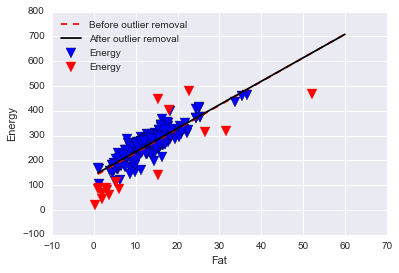

In [27]:
# Plot the old and new regression lines together
xs = np.linspace(1,60, 2)
ys1 = modelfats.predict({'Fat': xs})
ys2 = modelfats2.predict({'Fat': xs})
plt.scatter(df_all_fast_food_cleaned.Fat, df_all_fast_food_cleaned.Energy, 
            s=100, marker='v')
plt.scatter(dffastfoodz.Fat.iloc[outlier_indexes], 
            dffastfoodz.Energy.iloc[outlier_indexes], 
            s=100, color='r', marker='v')
plt.plot(xs, ys1, 'r--', label='Before outlier removal')
plt.plot(xs, ys2, 'k', label='After outlier removal')
plt.legend(loc='upper left')
plt.xlabel('Fat')
plt.ylabel('Energy')
plt.grid(True)

# 4. General Questions

# (a) What is the limitation of the plotting functionality provided by pandas? Can you provide a specific example to support your argument? What alternative(s) do you use instead and why?

The limitation of the plotting functionality provided by pandas is that it lacks in style, making the data visualizations less redable and/or attractive to the eye. In addition, when using some pandas plotting commands, you manually have to specify axis labels. A specific example of this would be when plotting a simple scatterplot, to label the x and y axis, the default pandas formatting requires two extra lines of code. An alternative is to use seaborn. You use seaborn becase it has built in functionality to style and color plots more attractively and label axes automatically.

# (b) Among all the plots you make in Problem 2, which ones are showing quantitative variables? Which ones are showing nominal (categorical) variables? Which ones are involved with both?


Quantitative variables: 2a, 2b, 2c, 2d, 2e, 2f, 2g, 2h
Nominal variables: 2a, 2b, 2c, 2d, 2f, 2g
Both: 2a, 2b, 2c, 2d, 2f, 2g

# (c) Based on (b), explain how seaborn makes certain types of plots significantly easier to produce compared to using pandas and matplotlib

Seaborn makes it easier to graph both quantitative and nominal variables within one singular graph. It's ability to allow for different color groupings, or "hues", based on a particular by group or category of variable makes it easier for us to understand the data that is being displayed and put into a visualization in front of us. Seaborn makes it exceptionally easy, through these color groupings, to tell the difference between all the different data types and information being displayed on the singular graph.